<a href="https://colab.research.google.com/github/Andrian0s/ML4NLP1-2024-Tutorial-Notebooks/blob/main/exercises/ex1/ex1_lr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML4NLP1

## Starting Point for Exercise 1, part I

This notebook is supposed to serve as a starting point and/or inspiration when starting exercise 1, part I.

One of the goals of this exercise is to get you acquainted with sklearn and related libraries like pandas and numpy. You will probably need to consult the documentation of those libraries:
- sklearn: [Documentation](https://scikit-learn.org/stable/user_guide.html)
- Pandas: [Documentation](https://pandas.pydata.org/docs/#)
- NumPy: [Documentation](https://numpy.org/doc/)
- SHAP: [Documentation](https://shap.readthedocs.io/en/latest/index.html)

## Task Description

Follow the instructions in this notebook to:

1. Explore the data and create training/test splits for your experiments

2. Build a LogisticRegression classifier and design some relevant features to apply it to your data

3. Conduct hyperparameter tuning to find the optimal hyperparameters for your model

4. Explore your model's predictions and conduct an error analysis to see where the model fails

5. Conduct an interpretability analysis, investigating the model's most important features.

6. Conduct an ablation study using a subset of languages


Throughout the notebook, there are questions that you should address in your report. These are marked with 🗒❓.

☝ Note, these questions are intended to provide you with an opportunity to reflect on what it is that you are doing and the kind of challenges you might face along the way.




In [4]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

### Loading the datasets

In [3]:

# Download dataset
!gdown 1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs # x_train
!gdown 1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6 # x_test
!gdown 1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl # y_train
!gdown 1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X # y_test

Downloading...
From: https://drive.google.com/uc?id=1QP6YuwdKFNUPpvhOaAcvv2Pcp4JMbIRs
To: /home/work/Documents/GitHub/ML4NLP1/exercises/ex1/x_train.txt
100%|██████████████████████████████████████| 64.1M/64.1M [00:04<00:00, 14.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QVo7PZAdiZKzifK8kwhEr_umosiDCUx6
To: /home/work/Documents/GitHub/ML4NLP1/exercises/ex1/x_test.txt
100%|██████████████████████████████████████| 65.2M/65.2M [00:05<00:00, 11.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QbBeKcmG2ZyAEFB3AKGTgSWQ1YEMn2jl
To: /home/work/Documents/GitHub/ML4NLP1/exercises/ex1/y_train.txt
100%|████████████████████████████████████████| 480k/480k [00:00<00:00, 7.69MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QaZj6bI7_78ymnN8IpSk4gVvg-C9fA6X
To: /home/work/Documents/GitHub/ML4NLP1/exercises/ex1/y_test.txt
100%|████████████████████████████████████████| 480k/480k [00:00<00:00, 9.13MB/s]


In [5]:
with open(f'x_train.txt') as f:
    x_train = f.read().splitlines()
with open(f'y_train.txt') as f:
    y_train = f.read().splitlines()
with open(f'x_test.txt') as f:
    x_test = f.read().splitlines()
with open(f'y_test.txt') as f:
    y_test = f.read().splitlines()

In [6]:
# Combine x_train and y_train into one dataframe
train_df = pd.DataFrame({'text': x_train, 'label': y_train})
# Write train_df to csv with tab as separator
train_df.to_csv('train_df.csv', index=False, sep='\t')
# Comibne x_test and y_test into one dataframe
test_df = pd.DataFrame({'text': x_test, 'label': y_test})
# Inspect the first 5 items in the train split
train_df.head()

,text,label
0,Klement Gottwaldi surnukeha palsameeriti ning ...,est
1,"Sebes, Joseph; Pereira Thomas (1961) (på eng)....",swe
2,भारतीय स्वातन्त्र्य आन्दोलन राष्ट्रीय एवम क्षे...,mai
3,"Après lo cort periòde d'establiment a Basilèa,...",oci
4,ถนนเจริญกรุง (อักษรโรมัน: Thanon Charoen Krung...,tha


In [7]:
# Get list of all labels
labels = train_df['label'].unique().tolist()
print(labels)

['est', 'swe', 'mai', 'oci', 'tha', 'orm', 'lim', 'guj', 'pnb', 'zea', 'krc', 'hat', 'pcd', 'tam', 'vie', 'pan', 'szl', 'ckb', 'fur', 'wuu', 'arz', 'ton', 'eus', 'map-bms', 'glk', 'nld', 'bod', 'jpn', 'arg', 'srd', 'ext', 'sin', 'kur', 'che', 'tuk', 'pag', 'tur', 'als', 'koi', 'lat', 'urd', 'tat', 'bxr', 'ind', 'kir', 'zh-yue', 'dan', 'por', 'fra', 'ori', 'nob', 'jbo', 'kok', 'amh', 'khm', 'hbs', 'slv', 'bos', 'tet', 'zho', 'kor', 'sah', 'rup', 'ast', 'wol', 'bul', 'gla', 'msa', 'crh', 'lug', 'sun', 'bre', 'mon', 'nep', 'ibo', 'cdo', 'asm', 'grn', 'hin', 'mar', 'lin', 'ile', 'lmo', 'mya', 'ilo', 'csb', 'tyv', 'gle', 'nan', 'jam', 'scn', 'be-tarask', 'diq', 'cor', 'fao', 'mlg', 'yid', 'sme', 'spa', 'kbd', 'udm', 'isl', 'ksh', 'san', 'aze', 'nap', 'dsb', 'pam', 'cym', 'srp', 'stq', 'tel', 'swa', 'vls', 'mzn', 'bel', 'lad', 'ina', 'ava', 'lao', 'min', 'ita', 'nds-nl', 'oss', 'kab', 'pus', 'fin', 'snd', 'kaa', 'fas', 'cbk', 'cat', 'nci', 'mhr', 'roa-tara', 'frp', 'ron', 'new', 'bar', 'ltg'


### 1.1 Exploring the training data

📝❓Take a look at a couple of texts from different languages and answer the following questions:

1. Do you notice anything that might be challenging for the classification?
There are a lot of really close languages in the dataset. Like Czech and Slovak, Polish and Kashubian, Upper Sorbian and Lower Sorbian and a lot more. This is just a small illustrative sample.
2. How is the data distributed? (i.e., how many instances per label are there in the training and test set? Is it a balanced dataset?)
Yes, it is a perfectly balanced set. We have exactly 500 instances per class.
3. Do you think the train/test split is appropriate (i.e., is the test data representative of the training data)? If not, please rearrange the data in a more appropriate way.
The original test/train split is not appropriate. We have the same ammount of training and test data. Normally these distributions are more in the range of 80/20 train/test...
So I will concat them and make new distributions.

In [8]:
import pandas as pd

pd.set_option('display.max_rows', None)
# Print the full label distribution
print(train_df['label'].value_counts())

print("Training samples:", len(train_df))
print("Testing samples:", len(test_df))

# Concatenate train and test dataframes
full_df = pd.concat([train_df, test_df]).reset_index(drop=True)
# Inspect the new dataframe
print(full_df['label'].value_counts())

print("Full_df samples:", len(full_df))



label
est          500
swe          500
mai          500
oci          500
tha          500
orm          500
lim          500
guj          500
pnb          500
zea          500
krc          500
hat          500
pcd          500
tam          500
vie          500
pan          500
szl          500
ckb          500
fur          500
wuu          500
arz          500
ton          500
eus          500
map-bms      500
glk          500
nld          500
bod          500
jpn          500
arg          500
srd          500
ext          500
sin          500
kur          500
che          500
tuk          500
pag          500
tur          500
als          500
koi          500
lat          500
urd          500
tat          500
bxr          500
ind          500
kir          500
zh-yue       500
dan          500
por          500
fra          500
ori          500
nob          500
jbo          500
kok          500
amh          500
khm          500
hbs          500
slv          500
bos          500
tet     

### 1.2 Data preparation

Get a subset of the train/test data that includes 20 languages.
Include English, German, Dutch, Danish, Swedish, Norwegian, and Japanese, plus 13 additional languages of your choice based on the items in the list of labels.

In [9]:
from sklearn.model_selection import train_test_split

subset_df = full_df[full_df['label'].isin(['eng', 'deu', 'nld', 'dan', 'swe', 'nob', 'jpn', 'cmn', 'rus', 'ukr', 'gle', 'fin', 'ara', 'hin', 'asm', 'tam', 'cor', 'wuu', 'khm', 'jav'])]
final_train_df, final_test_df = train_test_split(subset_df, 
                                                test_size=0.2, 
                                                stratify=subset_df['label'], 
                                                random_state=42)

X_train_final = final_train_df['text']
y_train_final = final_train_df['label']
X_test_final  = final_test_df['text']
y_test_final  = final_test_df['label']

In [10]:
# TODO: With the following code, we wanted to ENCODE the labels, however, our cat was walking on the keyboard and some of it got changed. Can you fix it?
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder().fit(y_train_final)
y_train_enc, y_test_enc = label_encoder.transform(y_train_final), label_encoder.transform(y_test_final)
pd.set_option('display.max_columns', None)
print("Classes:", label_encoder.classes_)
print("Encoded y_train:", y_train_enc)
print("Encoded y_test:", y_test_enc)

Classes: ['ara' 'asm' 'cor' 'dan' 'deu' 'eng' 'fin' 'gle' 'hin' 'jav' 'jpn' 'khm'
 'nld' 'nob' 'rus' 'swe' 'tam' 'ukr' 'wuu']
Encoded y_train: [ 8  1  3 ...  0 16 11]
Encoded y_test: [17  0 14 ... 12  3 18]


### 2.1 Build a LogisticRegression classifier

To start with, we're going to build a very simple LogisticRegression classifier.
Use a `Pipeline` to chain togther a `CountVectorizer` and a `LogisticRegression` estimator. Then perform a 5-fold cross validation and report the scores of this model as a baseline.

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

# TODO: Define a very basic pipeline using a CountVectorizer and a LogisticRegression classifier
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression(max_iter=1000))
])




In [9]:
# TODO: Run a cross validation to estimate the model's expected performance
scores = cross_val_score(pipeline, final_train_df['text'], final_train_df['label'], cv=5, scoring='accuracy')

print("Cross-validation scores:", scores)
print("Mean cross-validation score:", scores.mean())
print("Standard deviation of cross-validation scores:", scores.std())

Cross-validation scores: [0.94046053 0.9375     0.92730263 0.93782895 0.93717105]
Mean cross-validation score: 0.9360526315789475
Standard deviation of cross-validation scores: 0.0045275396142329775



### 2.2 Feature Engineering

So far, we've only considered the basic `CountVectorizer` at the word level to encode our input texts for our model.

Your task is to apply some text preprocessing and engineer some more informative features.

To do this, think about what other features might be relevant for determining the language of an input text.

Define a custom set of feature extractors and implement the necessary preprocessing steps to extract these features from strings.

Then initialise a processing pipeline that converts your input data into features that the model can take as input.

☝ Note, this step can be as involved as your heart desires, there is only one minimal requirement: you must use something more than the base `CountVectorizer`. We recommend that you take a look at the [`BaseEstimator`](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html) and [`TransformerMixin`](https://scikit-learn.org/stable/modules/generated/sklearn.base.TransformerMixin.html#transformermixin) classes from `sk-learn`, as these can be helpful for defining custom transformers.


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    analyzer='char',
    ngram_range=(2, 4),
    max_features=20000,
    sublinear_tf=True,
    min_df=2
)

# Fit on training data
X_train_vec = vectorizer.fit_transform(X_train_final)

# Transform test data with the same vectorizer
X_test_vec = vectorizer.transform(X_test_final)


---

### 3.1 Grid Search

Use sklearn's GridSearchCV and experiment with the following hyperparameters:
1. Penalty (Regularization)
2. Solver
3. Experiment with parameters of the Vectorizer (optional, but highly advised)

☝ Note, don't overdo it at the beginning, since runtime might go up fast!

Make sure you read through the [docs](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html#logisticregression) to get an understanding of what these parameters do.


In [ ]:
# TODO: GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define pipeline
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(analyzer='char', ngram_range=(2,4))),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Define parameter grid (only solver + penalty)
param_grid = {
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__penalty': ['l1', 'l2']
}

# Run grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=4)
grid_search.fit(X_train_final, y_train_enc)



/home/work/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/work/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/home/work/.local/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which suppor

Best parameters: {'classifier__penalty': 'l2', 'classifier__solver': 'saga'}
Best CV score: 0.9782236842105263
Test accuracy: 0.9860526315789474


In [12]:
# Write to disk:
import joblib
import os

# Define path to current directory (where your notebook is)
save_path = os.path.join(os.getcwd(), "grid_search.pkl")

# Save the grid search object
joblib.dump(grid_search, save_path)

print(f"Grid search saved to: {save_path}")


Grid search saved to: /home/work/Documents/GitHub/ML4NLP1/exercises/ex1/grid_search.pkl


### 3.2 Best Model Selection

After conducting our Grid Search, we should be able to identify our best model by inspecting the using the Grid Search result attribute `cv_results_`. (Hint: `cv_results_` returns a dictionay, so convert it to a Pandas Dataframe for easy inspection.)

📝❓ What were the hyperparameter combinations for your best-performing model on the test set.

📝❓ What is the advantage of grid search cross-validation?


In [2]:

import joblib
import os
import pandas as pd

# Define the path to your saved file
save_path = os.path.join(os.getcwd(), "grid_search.pkl")

# Load the grid search object
grid_search = joblib.load(save_path)
# TODO: Select the best model based on the GridSearch results
# Convert cv_results_ dict to DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# Sort by mean test score (highest accuracy first)
results_df = results_df.sort_values(by='mean_test_score', ascending=False)

# Display top results
print(results_df[['mean_test_score', 'std_test_score',
                  'param_classifier__solver', 'param_classifier__penalty']].head())

   mean_test_score  std_test_score param_classifier__solver  \
3         0.978224        0.003515                     saga   
2         0.977566        0.003677                liblinear   
0         0.964276        0.005439                liblinear   
1         0.963684        0.005420                     saga   

  param_classifier__penalty  
3                        l2  
2                        l2  
0                        l1  
1                        l1  


## 3.3 Model Evaluation

Once you have identified your best model, use it to predict the languages of texts in the test split.

📝❓ According to standard metrics (e.g. Accurracy, Precision, Recall and F1), how well does your model perform on the heldout test set?


In [11]:
# TODO: Evaluate the model by inspecting the predictions on the heldout test set
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions
y_pred = grid_search.best_estimator_.predict(X_test_final)

# Calculate metrics
accuracy = accuracy_score(y_test_enc, y_pred)
precision = precision_score(y_test_enc, y_pred, average='weighted')
recall = recall_score(y_test_enc, y_pred, average='weighted')
f1 = f1_score(y_test_enc, y_pred, average='weighted')

# Print results
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")


Accuracy:  0.9861
Precision: 0.9875
Recall:    0.9861
F1 Score:  0.9864


---

### 4.1 Error Analysis

Inspect your model's predictions using a confusion matrix and provide a summary of what you find in your report.

📝❓ Where does your model do well and where does it fail?
In most cases it performs good. Some minor misclasifications happened in some cases. The only major misclassification happened in the class 11, where it predicted 12 instances as class 5.

📝❓ What are some possible reasons for why it fails in these cases?
Class 11 is "khm" which is Khmer, this was predicted as "eng" which is english. Our initial guess was, that the languages might be closely related. But they do not even have the same script. Further Khmer does not have a lot of loanwords from english, which could have led to confusion. So we do not know why.

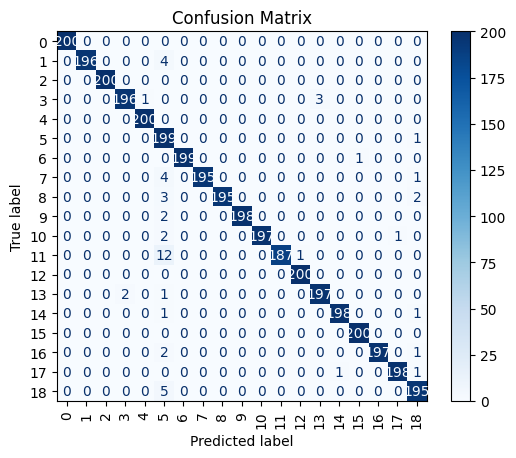

In [16]:
# TODO: Inspect the model's predcitions on the different classes
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Create confusion matrix
cm = confusion_matrix(y_test_enc, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.title("Confusion Matrix")
plt.show()


---

### 5.1 Interpretability Analysis

Now that you have your best model, it's time to dive deep into understanding how the model makes predictions.

It is important that we can explain and visualise our models to improve task performance. Explainable models help characterise model fairness, transparency, and outcomes.

Let's try to understand what our best-performing logistic regression classification model has learned.

Inspect the 20 most important features for the languages English, Swedish, Norwegian, and Japanese. Please make sure that the features are named and human-interpretable, not things like "Feat_1". (Hint: if you have used custom feature extractors in your pipeline, you may need to adapt these to make sure that the feature names are maintained.)

📝❓ What is more important, extra features or the outputs of the vectorizer? Please discuss.

We recommend using the [SHAP library](https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/linear_models/Sentiment%20Analysis%20with%20Logistic%20Regression.html) as discussed in the tutorial. We've provided an example notebook for working with SHAP for multi-class classification in the course GitHub repo.

☝ Note, if you prefer to use another interpretability tool, we will accept answers from any explanation library/method as long as the explanations for the model weights are provided in a structured/clear way.



In [17]:
# To use shap, we first need to install it into the current environment
!pip install --upgrade shap

import shap

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 13.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.3 MB/s eta 0:00:0000:0100:01


/home/work/.local/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# TODO: Inspect most important features according to the model using SHAP
best_model = grid_search.best_estimator_
print(best_model.named_steps.keys())
vectorizer = best_model.named_steps['vectorizer']
clf = best_model.named_steps['classifier']
# Get feature names (make sure they are interpretable!)
feature_names = np.array(vectorizer.get_feature_names_out())

# Get class names (languages)
classes = clf.classes_

print("Classes:", classes)
def show_top_features(class_label, top_n=19):
    # Find index of the language
    class_index = np.where(classes == class_label)[0][0]
    # Get coefficients for that language
    coefs = clf.coef_[class_index]
    # Sort by weight
    top_features_idx = np.argsort(coefs)[-top_n:]
    print(f"\nTop {top_n} features for {class_label}:")
    for i in reversed(top_features_idx):
        print(f"{feature_names[i]:<20} {coefs[i]:.4f}")

for lang in ['en', 'sv', 'no', 'ja']:  # English, Swedish, Norwegian, Japanese
    show_top_features(lang)

dict_keys(['vectorizer', 'classifier'])
Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


IndexError: index 0 is out of bounds for axis 0 with size 0

---

### 6.1 Ablation Study

Lastly, we want to conduct a small ablation study to investigate how well our model performs under different conditions.

As a first step, choose the two languages for which the classifier worked best.

Next, re-fit the best model six times, each time reducing the **length** of each instance in the training set. To do this, create a custom `TextReducer` class that you can include as a preprocessing step in your pipeline. The class should take a `max_len` argument as a hyperparameter that can be set to train the following models:

- Model 1: `max_len = None` (i.e. no truncation!)
- Model 2: `max_len = 500`
- Model 3: `max_len = 250`
- Model 4: `max_len = 150`
- Model 5: `max_len = 100`
- Model 6: `max_len = 50`

Use average accuracy over the cross validation scores for each model to measure performance for each ablation setting.

📝❓ How does the reduction of training data affect the performance of the classifier? And what could be some possible reasons for this?

In [ ]:
# TODO: Ablation study

---

📝❓ Write your lab report here addressing all questions in the notebook